In [1]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import math
import scipy. stats
import random
import scipy
import networkx as nx
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import pyplot, patches

from common import *

In [2]:
OBS, RFID, OBS_name_mapping = prepare_OBS_and_RFID()
OBS.head()

,DateTime,Actor,Recipient,Behavior,Category,Duration,Point,Day
15,2019-06-13 09:50:00,0,7,Grooming,Affiliative,6,NO,13
17,2019-06-13 09:50:00,0,7,Grooming,Affiliative,4,NO,13
19,2019-06-13 09:51:00,7,0,Resting,Affiliative,8,NO,13
20,2019-06-13 09:51:00,7,11,Resting,Affiliative,8,NO,13
21,2019-06-13 09:51:00,0,7,Grooming,Affiliative,36,NO,13


### Community detection

###  Kernighan–Lin algorithm (bipartition)

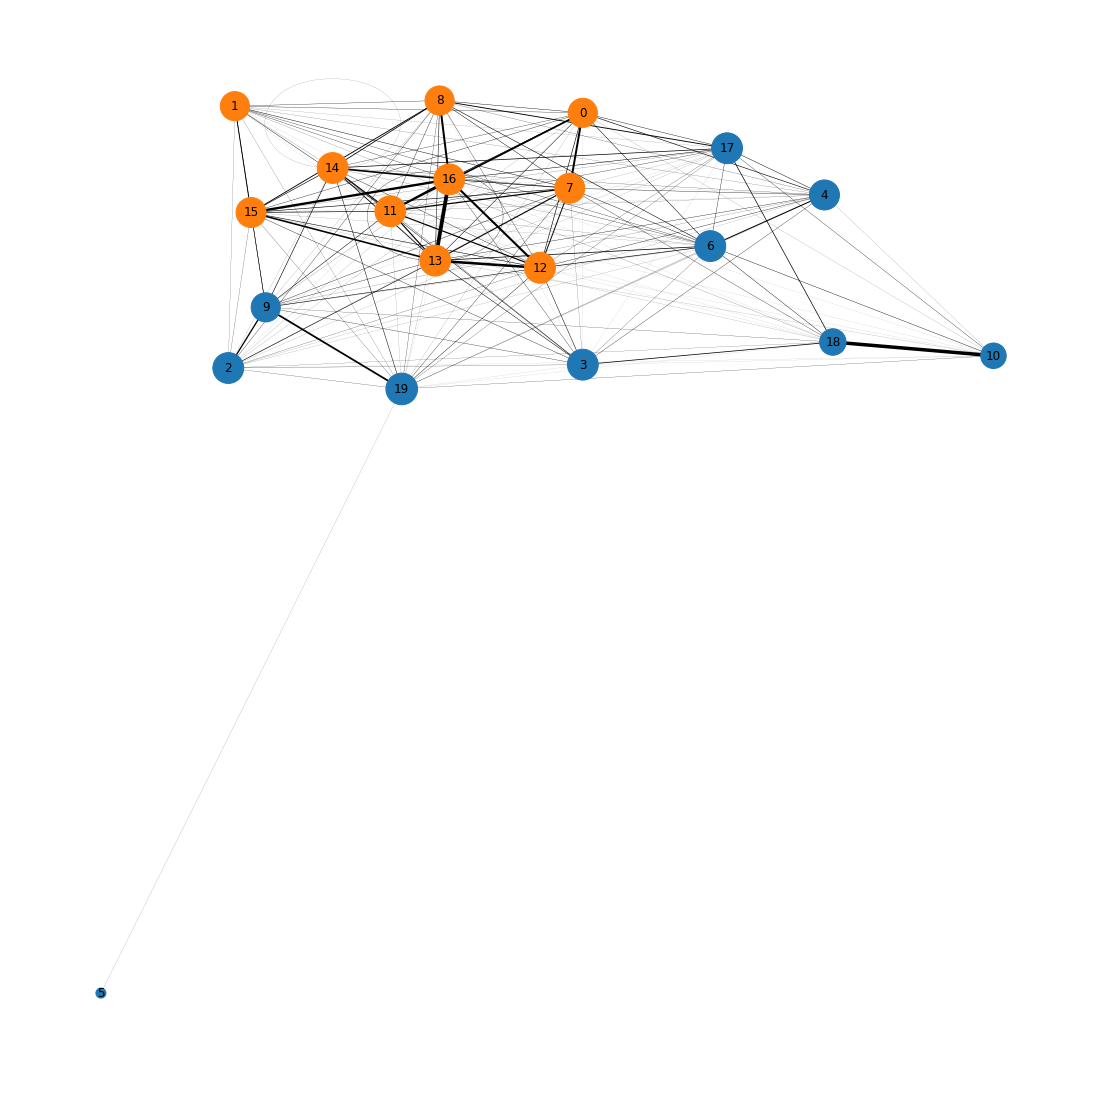

In [3]:
# weight='Duration'
G = create_graph_from_time(OBS, 'Actor', 'Recipient', OBS.DateTime.min(), OBS.DateTime.max()) 
communities = nx.community.kernighan_lin_bisection(G, max_iter=60)
colors = get_colors(G, communities)
plt.figure (figsize=(15, 15))
draw_community_graph(G, colors = colors, factor=20) 

In [4]:
G = create_graph_from_time(RFID, 'i', 'j', RFID.DateTime.min(), RFID.DateTime.max())

In [5]:
communities = nx.community.kernighan_lin_bisection(G, max_iter=30)

In [6]:
communities

({0, 4, 6, 7, 8, 17}, {1, 2, 3, 9, 10, 18, 19})

In [7]:
colors = get_colors(G, communities)

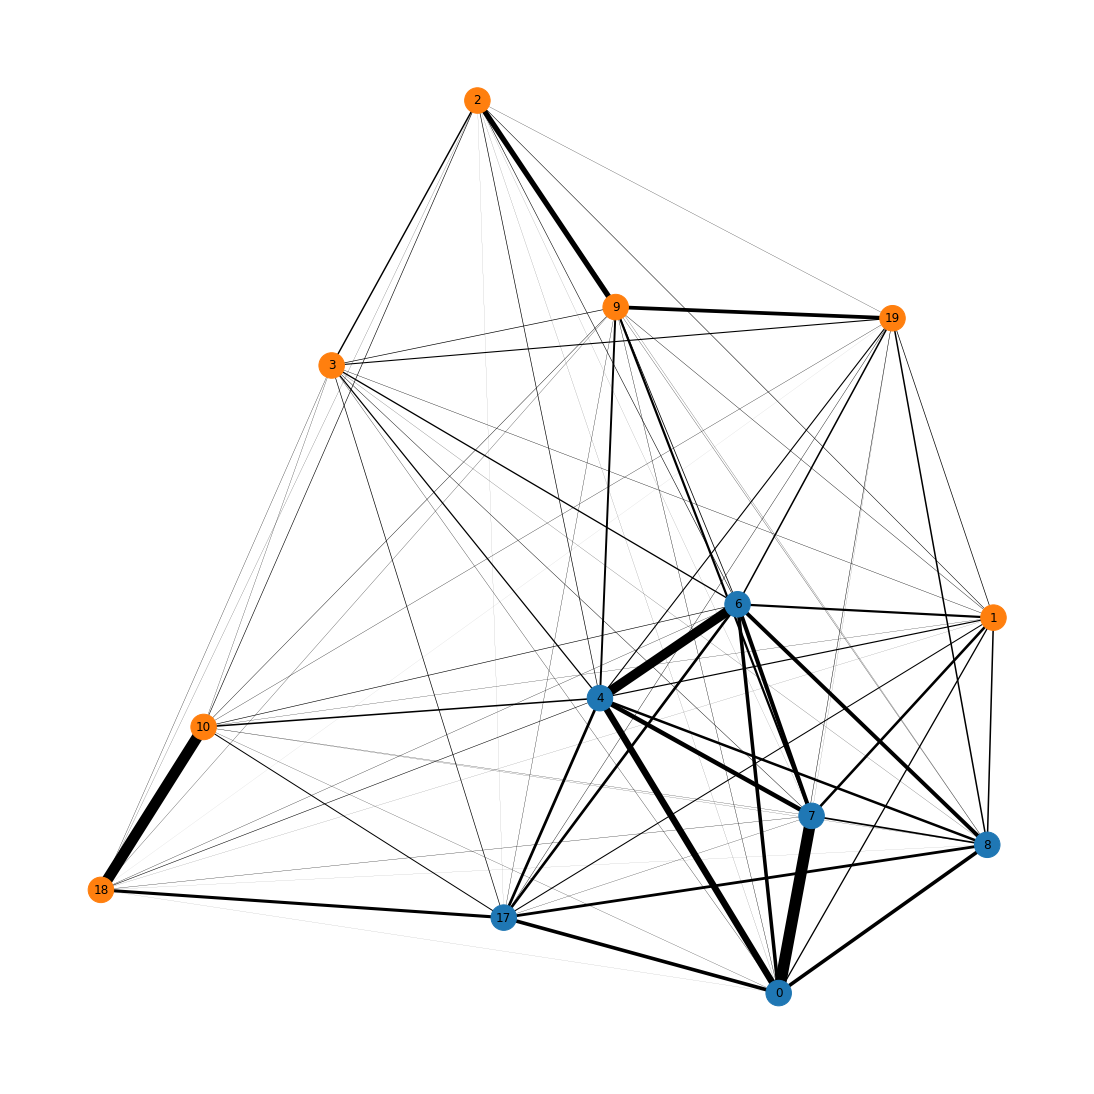

In [8]:
plt.figure (figsize=(15,15))
draw_community_graph(G, colors = colors) 

# Centralities

In [9]:
G = create_graph_from_time(OBS, 'Actor', 'Recipient', OBS.DateTime.min(), OBS.DateTime.max(), weight='Duration') 
centrality = nx.degree_centrality(G)
ei_centr = nx.eigenvector_centrality(G)
#katz = nx.katz_centrality(G)
closeness = nx.closeness_centrality(G)
info = nx.information_centrality(G)
harmonic = nx.harmonic_centrality(G)
pageR = nx.pagerank(G)

Text(0.5, 1.0, 'harmonic_centrality')

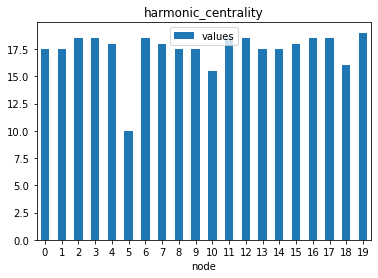

In [10]:
df = pd.DataFrame({'node':harmonic.keys(), 'values':harmonic.values()})
ax = df.plot.bar(x='node', y='values', rot=0)
plt.title("harmonic_centrality")

Text(0.5, 1.0, 'information_centrality')

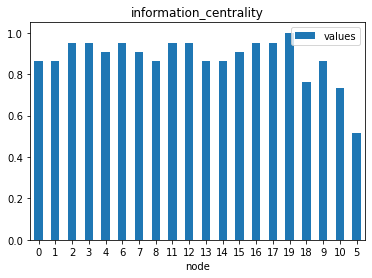

In [11]:
df = pd.DataFrame({'node':closeness.keys(), 'values':closeness.values()})
ax = df.plot.bar(x='node', y='values', rot=0)
plt.title("information_centrality")

Text(0.5, 1.0, 'closeness')

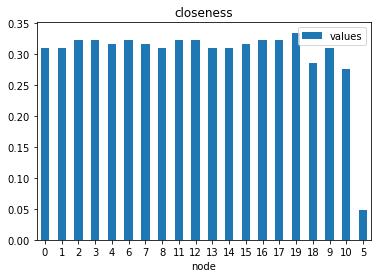

In [12]:
df = pd.DataFrame({'node': info.keys(), 'values':info.values()})
ax = df.plot.bar(x='node', y='values', rot=0)
plt.title("closeness")

Text(0.5, 1.0, 'Eigenvector_centrality')

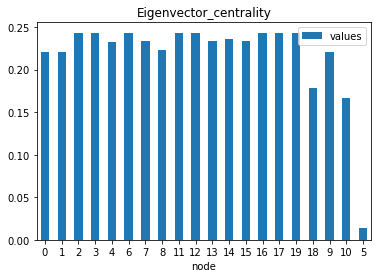

In [13]:
df = pd.DataFrame({'node':ei_centr.keys(), 'values':ei_centr.values()})
ax = df.plot.bar(x='node', y='values', rot=0)
plt.title("Eigenvector_centrality")

Text(0.5, 1.0, 'Centrality')

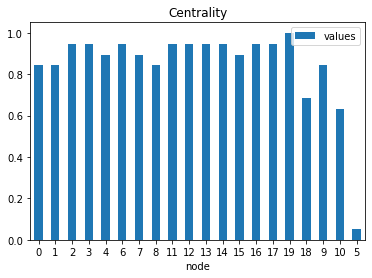

In [14]:
df = pd.DataFrame({'node':centrality.keys(), 'values':centrality.values()})
ax = df.plot.bar(x='node', y='values', rot=0)
plt.title("Centrality")

Text(0.5, 1.0, 'PageRank')

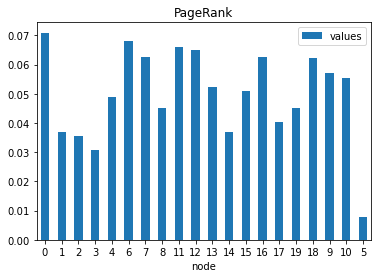

In [15]:
df = pd.DataFrame({'node':pageR.keys(), 'values':pageR.values()})
ax = df.plot.bar(x='node', y='values', rot=0)
plt.title("PageRank")

Большая часть алгоритмов хорошо выявила слабосвязанные ноды (5, 18, 10), однако за исключением PageRank ни один алгоритм не смог выявить существенные различия между оставшимися нодами. Вместе с тем, ноды выделенные PageRank отличаются от выделенных с помощью визуального анализа. Сравним частоты взаимодействий ноды-лидера по рейтингу PageRank и наиболее активной ноды, выделенной с помощью визуального анализа.     

In [16]:
OBS_Recipient0 = OBS[OBS['Recipient'] == 0]
OBS_Recipient0.groupby(['Category','Behavior']).size()

Category     Behavior            
Affiliative  Embracing                2
             Grooming                16
             Grunting-Lipsmacking    16
             Mounting                 1
             Playing with             4
             Presenting              24
             Resting                 94
             Touching                 8
Agonistic    Chasing                  2
             Submission               3
             Supplanting              1
dtype: int64

In [17]:
OBS_Recipient17 = OBS[OBS['Recipient'] == 17]
OBS_Recipient17.groupby(['Category','Behavior']).size()

Category     Behavior            
Affiliative  Grooming                31
             Grunting-Lipsmacking    11
             Mounting                 2
             Playing with             6
             Presenting              28
             Resting                 52
             Touching                 2
Agonistic    Submission               2
             Supplanting              1
dtype: int64

In [18]:
OBS_Actor17 = OBS[OBS['Actor'] == 17]
OBS_Actor0 = OBS[OBS['Actor'] == 0]

In [19]:
OBS_Actor17.groupby(['Category','Behavior']).size()

Category     Behavior            
Affiliative  Grooming                32
             Grunting-Lipsmacking    23
             Mounting                 7
             Presenting               6
             Resting                 29
             Touching                 4
Agonistic    Supplanting              1
             Threatening              2
dtype: int64

In [20]:
OBS_Actor0.groupby(['Category','Behavior']).size()

Category     Behavior            
Affiliative  Grooming                 24
             Grunting-Lipsmacking     11
             Playing with              2
             Presenting                5
             Resting                 137
             Touching                  4
Agonistic    Attacking                 2
             Chasing                   1
             Submission                4
             Supplanting               3
             Threatening               7
Other        Copulating                1
dtype: int64

Очевидно, что PageRank выделил ноду 0 не в силу общего превосходства частот взаимодействий.  

In [21]:
len(OBS_Recipient17.groupby(['Actor']).size().keys()), len(OBS_Recipient0.groupby(['Actor']).size().keys())

(18, 14)

In [22]:
len(OBS_Actor17.groupby(['Recipient']).size().keys()), len(OBS_Actor0.groupby(['Recipient']).size().keys())

(15, 15)

17а также взаимодействовала с большим числом других нод

In [23]:
OBS_Recipient17.groupby(['Actor']).size()

Actor
0     10
1      4
2      2
3      4
4     16
6      9
7      1
8     24
9      1
10     3
11     5
12     4
13     5
14    17
15     6
16     6
18    14
19     4
dtype: int64

In [24]:
OBS_Actor17.groupby(['Recipient']).size()

Recipient
0      8
1      2
3      1
4      9
6      7
7      2
8     18
10     6
11     6
13     2
14    14
15     3
16    10
18    13
19     3
dtype: int64

In [25]:
OBS_Actor0.groupby(['Recipient']).size()

Recipient
1      2
2      2
3      1
4      4
6      9
7     71
8     14
11    13
12    19
13    14
14     8
15     8
16    23
17    10
19     3
dtype: int64

In [26]:
OBS_Recipient0.groupby(['Actor']).size()

Actor
1      6
4     12
6     10
7     39
8      8
10     2
11    34
12    12
13    10
14     6
15     7
16    15
17     8
19     2
dtype: int64

Единственным заметным отличием ноды 0 является большее количество связей с нодой 7. Посмотрим какие выводы можно сделать из анализа разделения на комьюнити

### Communities in dynamics

### Kernighan–Lin algorithm in dynamics RFID, 5 days

In [37]:
def draw_dynamic_communities(data, graph_params, algorithm, alghorithm_params, step=5, pos=None, size=3, factor=100):
    
    start = data.DateTime.min()
    step = timedelta(days=step)
    finish = start + step
    max_date = data.DateTime.max()
    i = 1

    while start < max_date:
        G = create_graph_from_time(data, **graph_params, t_min=start, t_max=finish)
        if start == data.DateTime.min() and pos is None:
            pos = nx.spring_layout(G)
        communs = algorithm(G, **alghorithm_params)
        cols = get_colors(G, communs)
        plt.subplot(size,size,i)
        draw_community_graph(G, pos = pos, colors = cols, factor=factor) 
        start = start + step
        finish = start + step  if finish + step < max_date else max_date
        i += 1
    plt.show()

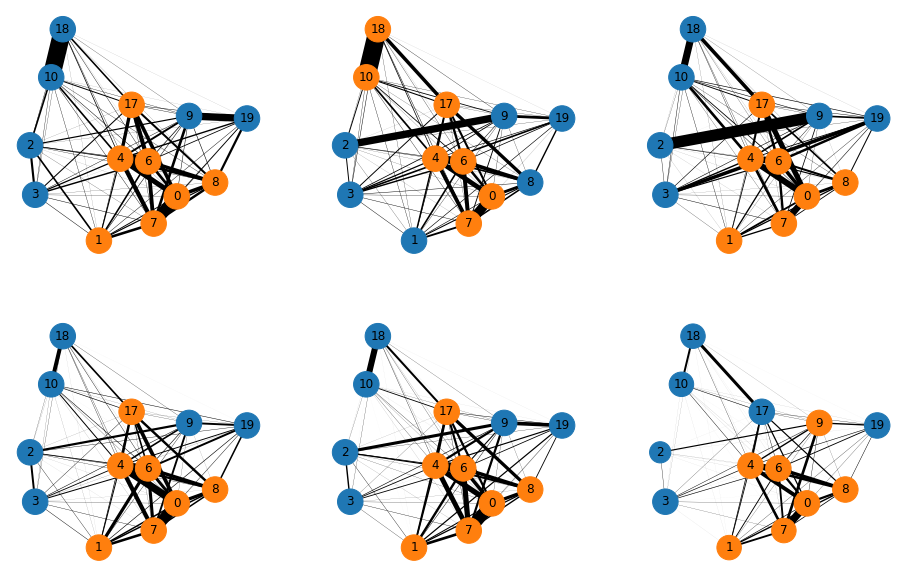

In [38]:
plt.figure(figsize=(16,16))
graph_params = {'column1' : 'i', 'column2' : 'j', 'weight' : None}
alg_params = {'max_iter' : 40, 'seed' : 140}
draw_dynamic_communities(RFID, graph_params, nx.community.kernighan_lin_bisection, alg_params)

### one day

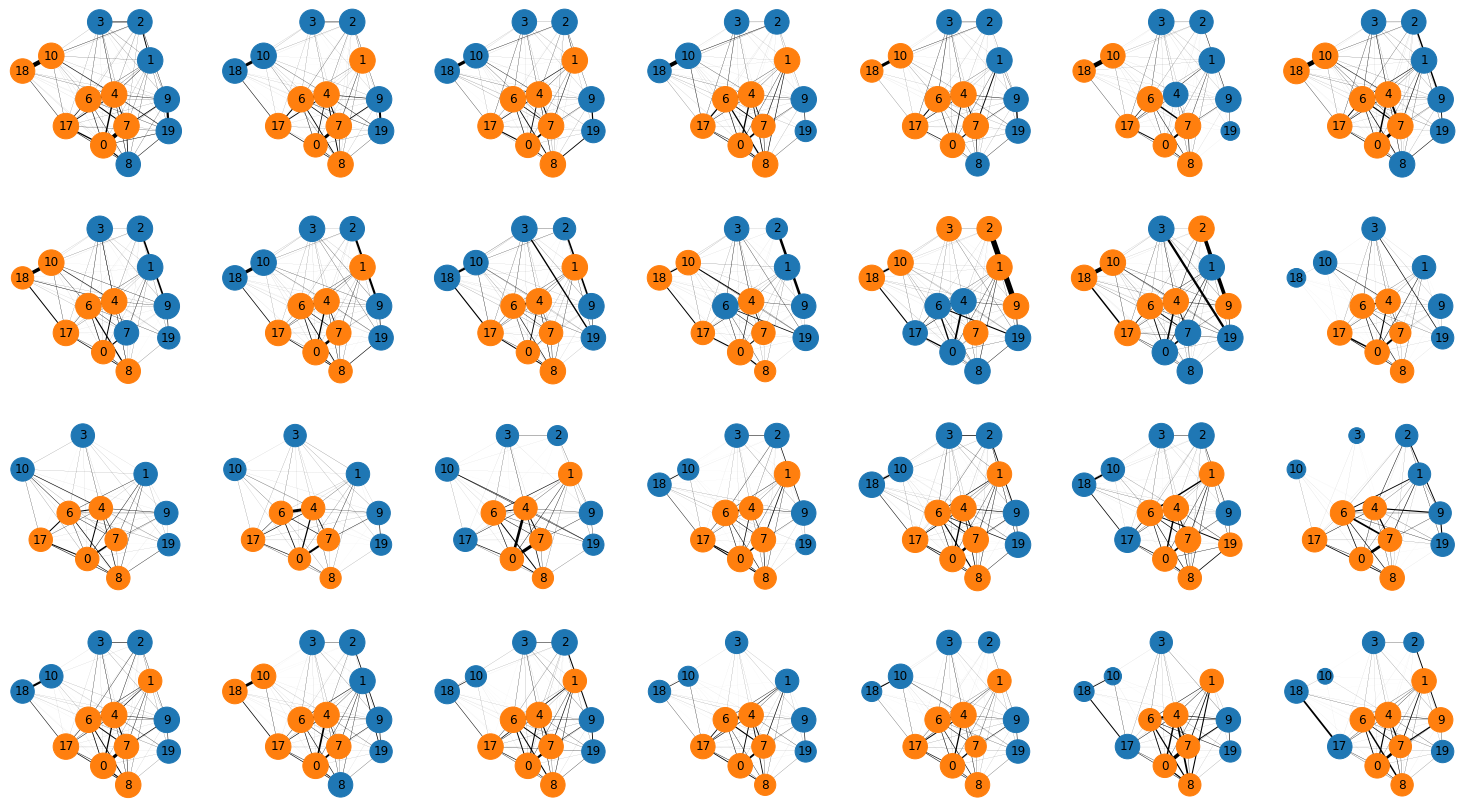

In [39]:
plt.figure(figsize=(26,26))
graph_params = {'column1' : 'i', 'column2' : 'j', 'weight' : None}
alg_params = {'max_iter' : 30, 'seed' : 140}
draw_dynamic_communities(RFID, graph_params, nx.community.kernighan_lin_bisection, alg_params, step=1, size=7)

### Kernighan–Lin algorithm in dynamics with duration OBS, 5 days

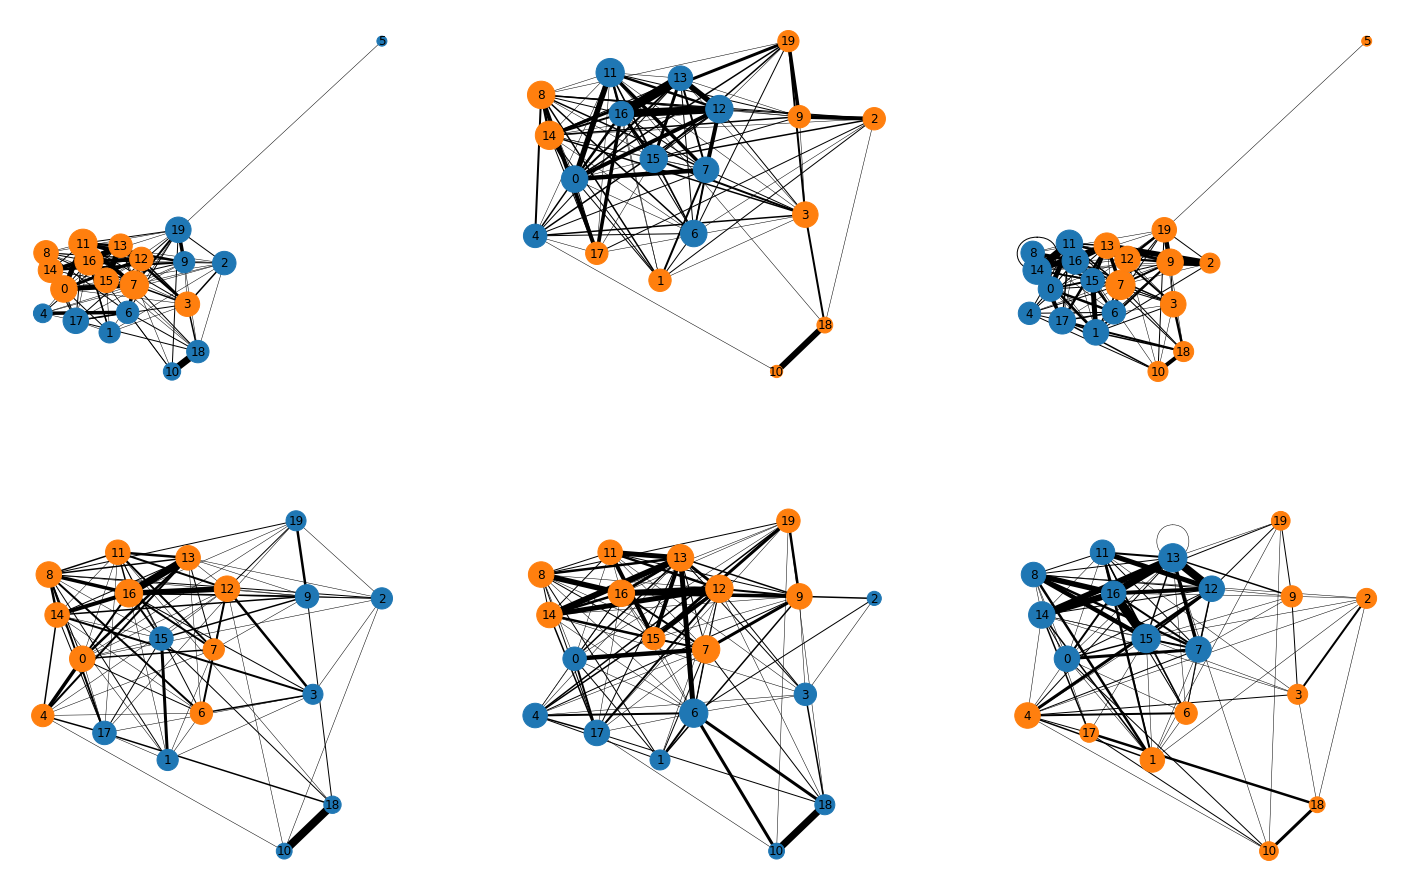

In [40]:
plt.figure(figsize=(25,25))
graph_params = {'column1' : 'Actor', 'column2' : 'Recipient', 'weight' : None}
alg_params = {'max_iter' : 40, 'seed' : 140}
G = create_graph_from_time(OBS, 'Actor', 'Recipient', OBS.DateTime.min(), OBS.DateTime.max())
position = nx.spring_layout(G)
draw_dynamic_communities(OBS, graph_params, nx.community.kernighan_lin_bisection, alg_params, pos = position, 
                         factor=2)

### label_propagation_communities, RFID, 5 days

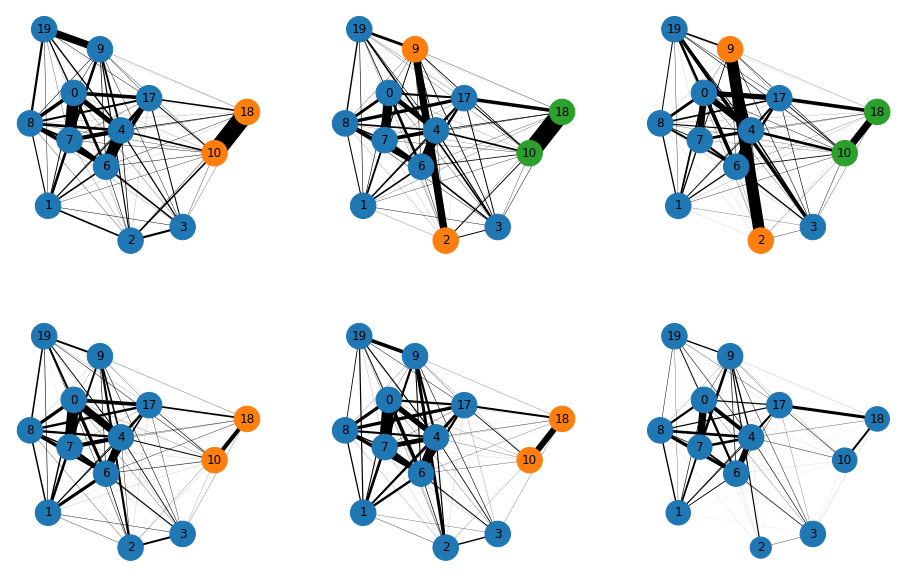

In [35]:
plt.figure(figsize=(16,16))
graph_params = {'column1' : 'i', 'column2' : 'j', 'weight' : None}
alg_params = {'weight' : 'weight'}
draw_dynamic_communities(RFID, graph_params, nx.community.asyn_lpa_communities, alg_params, factor=100)

## asyn_fluidc

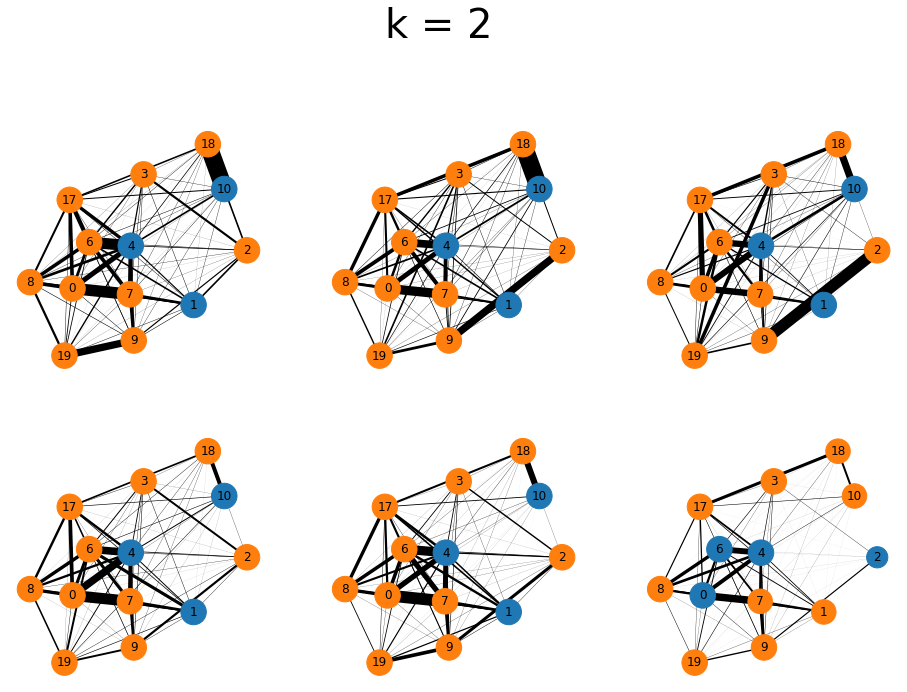

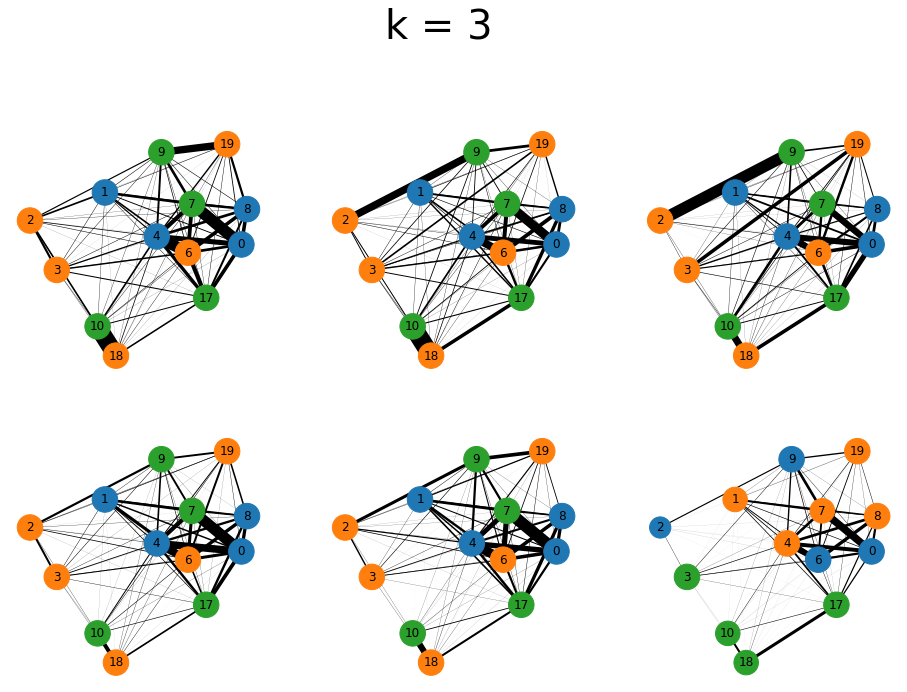

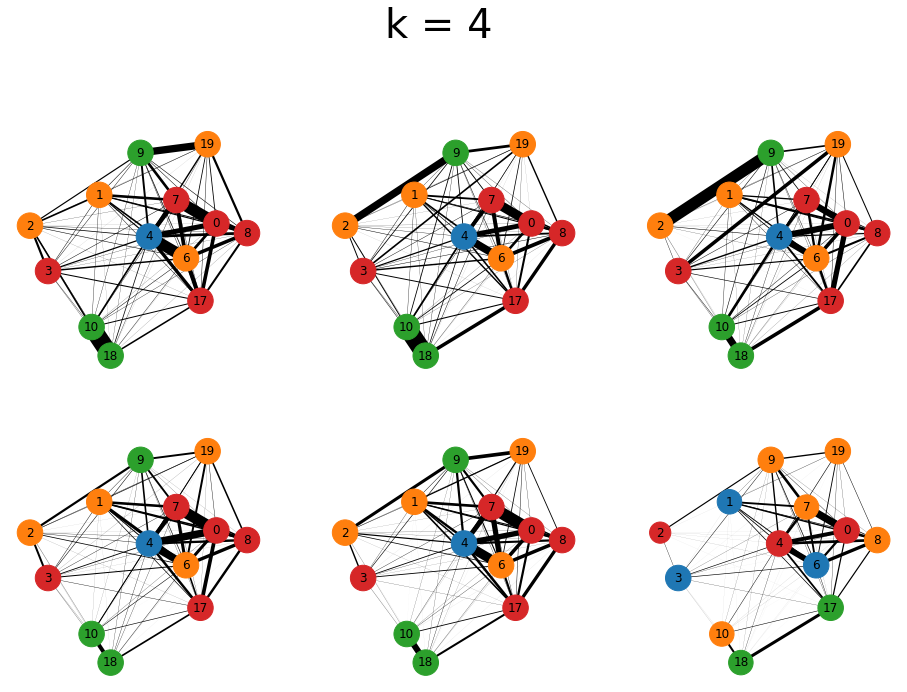

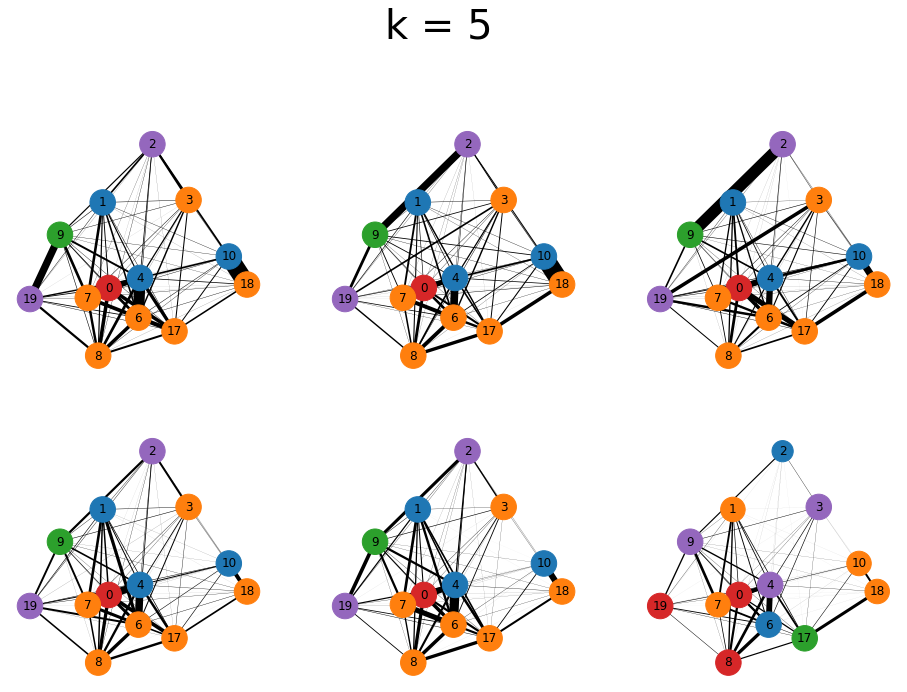

In [36]:
for k in range(2,6):
    plt.figure(figsize=(16,16))
    plt.suptitle(f'k = {k}', fontsize=40)
    graph_params = {'column1' : 'i', 'column2' : 'j', 'weight' : None}
    alg_params = {'k' : k, 'seed' : 10}
    draw_dynamic_communities(RFID, graph_params, nx.community.asyn_fluidc, alg_params, factor=100)
    plt.show()